In [132]:
#Import dependinces
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [133]:
#making the dataframe
df= pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [134]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


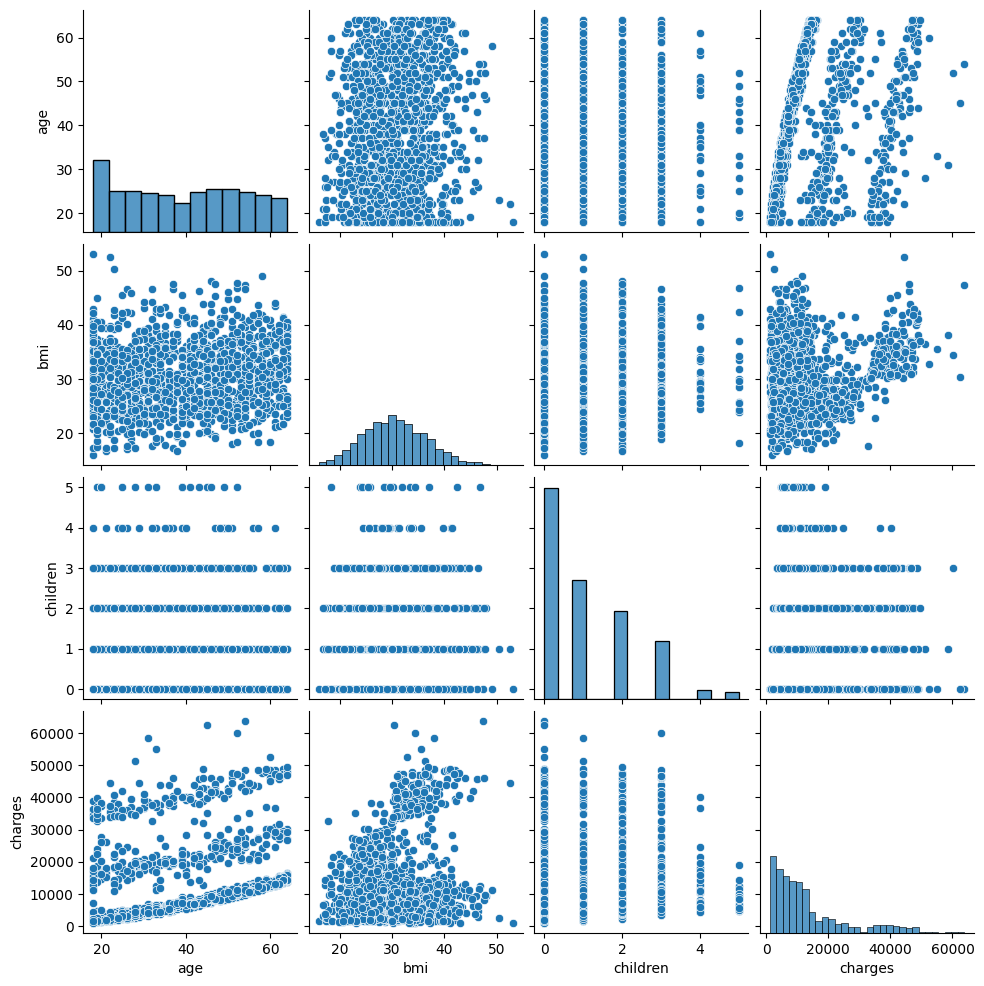

In [135]:
sns.pairplot(df)

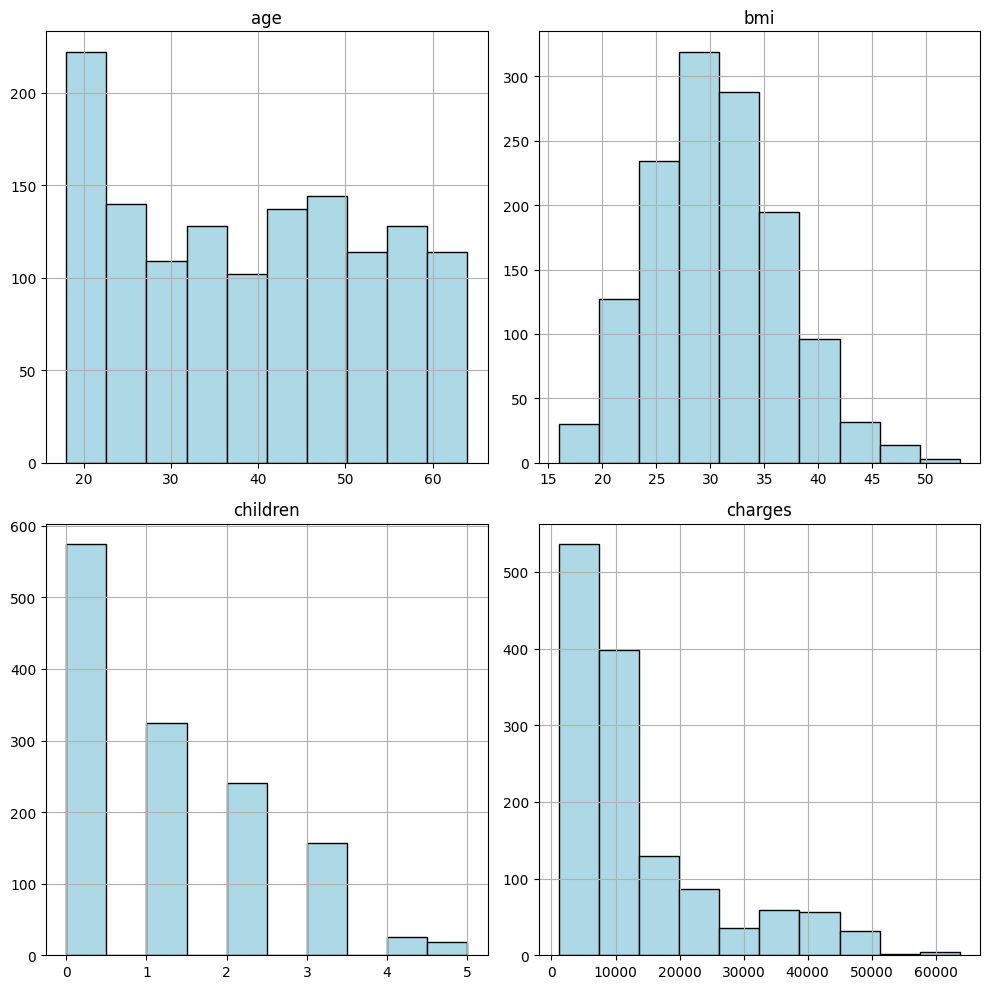

In [136]:
df.hist(bins=10,edgecolor="black",color="lightblue",figsize=(10,10))
plt.tight_layout()
plt.show()

In [137]:
print(df.isnull().sum())
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [138]:
df.smoker.value_counts()
df.children.value_counts()
df.bmi.value_counts()
df.sex.value_counts()
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [139]:
df["sex"]=df["sex"].apply(lambda x: 1 if x=="male" else 0)
df["smoker"]=df["smoker"].apply(lambda x:1 if x=="yes" else 0)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [140]:
df=df.join(pd.get_dummies(df.region,dtype=int)).drop("region",axis=1)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'northeast'}>,
        <Axes: title={'center': 'northwest'}>,
        <Axes: title={'center': 'southeast'}>],
       [<Axes: title={'center': 'southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

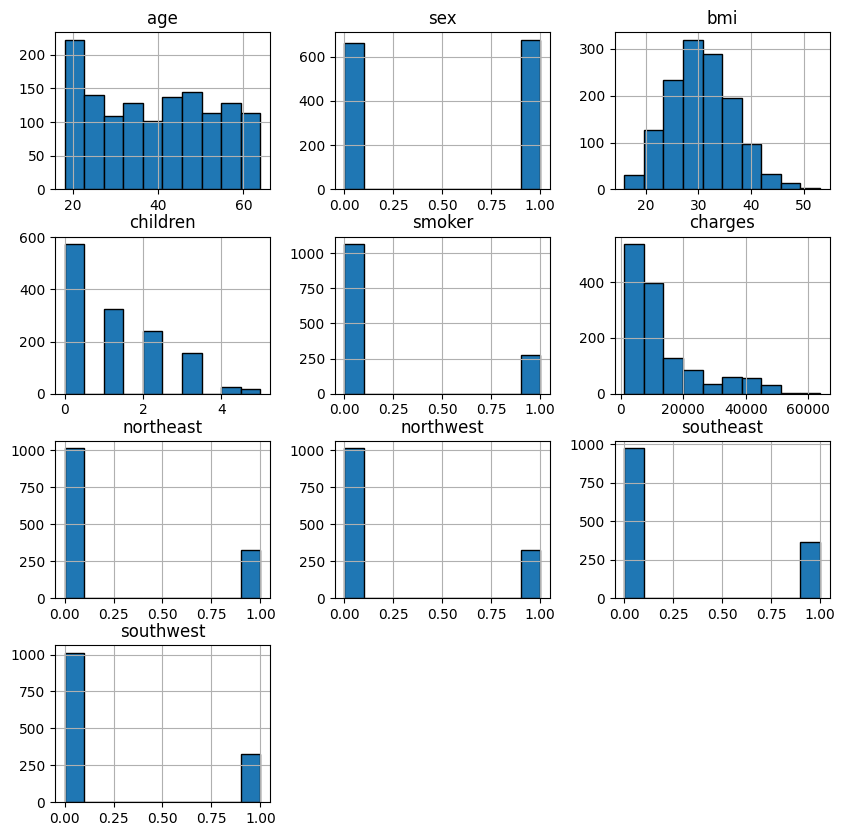

In [141]:
df.hist(figsize=(10,10),edgecolor="black")

In [142]:
df.info()#finding empty values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   int32  
 7   northwest  1338 non-null   int32  
 8   southeast  1338 non-null   int32  
 9   southwest  1338 non-null   int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 83.8 KB


<Axes: >

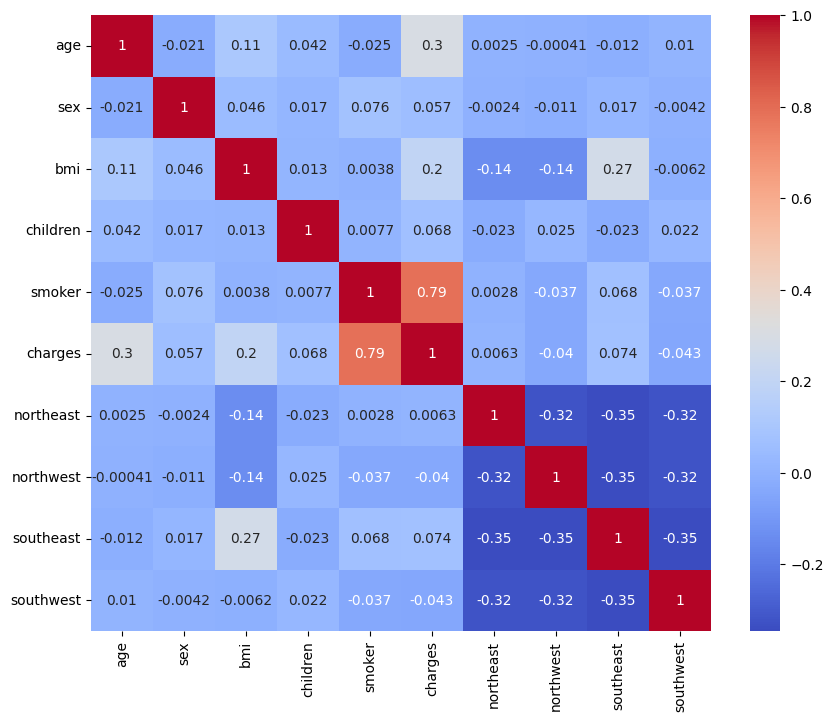

In [143]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

X=df.drop("charges",axis=1)
y=df["charges"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [145]:
model=RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)


RandomForestRegressor(n_jobs=-1)

In [146]:
model.score(X_test,y_test)

0.8102265569980255

In [147]:
y_pred=model.predict(X_test)
rmse=root_mean_squared_error(y_test,y_pred)
rmse

5369.374801136933

Text(0.5, 1.0, 'Predction vs Reality')

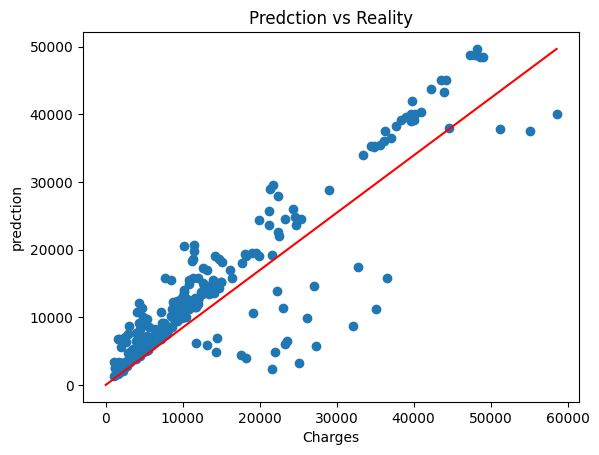

In [148]:
plt.scatter(y_test,y_pred)
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_pred)),color="red")
plt.xlabel("Charges")
plt.ylabel("predction")
plt.title("Predction vs Reality")

In [149]:
#imp features 
feature_importances=sorted(zip(model.feature_names_in_,model.feature_importances_),key=lambda x:x[1],reverse=True)

Text(0.5, 1.0, 'Feature Importances')

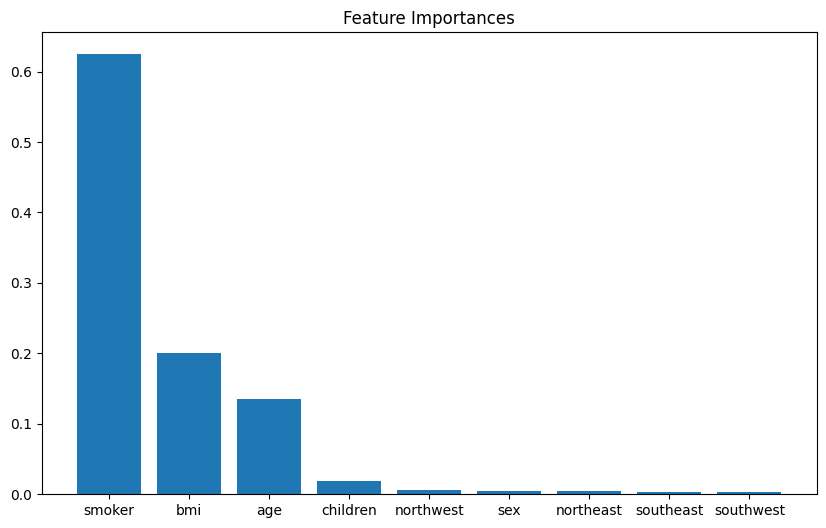

In [150]:
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in feature_importances],[x[1] for x in feature_importances])
plt.title("Feature Importances")